# Data Visualization

By the end of the tutorials of this week, you should acquire:

**Knowledge on:**
* Considerations about **unit of analysis**
* Descriptive exploration of data to answer RQ
* Univariate data visualization 
* Bivariate data visualization
* Reporting and interpretation

**Skills:**
* .drop_duplicates()
* .describe(), .value_counts()
* Using Seaborn 
* Choosing the appropriate chart for visualizations
* Interpreting visualizations and descriptives
* Writing up report in Markdown

# Before starting: Installing seaborn

In terminal (or Anaconda Prompt), type:

```conda install seaborn```


# What we will do today?

We will continue with the research questions we had for DA3, and the dataset that we prepared for this analysis. However, there were two important things that we missed (also in our RQs):
* Sentiment of the comments posted under each video
* The number of shares that each video received

So our RQ's now are:
* RQ1. To what extent does the sentiment expressed in the title of the video influence user engagement (views, likes, dislikes **and shares**)?
* RQ2. To what extent does the sentiment expressed in the title of the video vary depending on the category in which the video is published?
* RQ3. To what extent does the sentiment expressed in the title of the video vary depending on whether Greta Thunberg is mentioned?
* RQ3a. To what extent the category of the video is related to mentions of Greta Thunberg on the title?
* RQ4. To what extent does the **sentiment expressed in the comments of each video** vary depending on whether Greta Thunberg is mentioned in the video title?

*Note: I am sure that the research question you'll write for Assignment 1 will be a lot more interesting - and written in a much better way ;-)*




## Loading the modules we need

Please note how we are now also loading seaborn (a data visualization module). We also include the ```%matplotlib inline``` to tell Jupyter Notebook to show the charts in the notebook itself.

In [2]:
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x) # numbers are shown in the float format, not the scientific format.
%matplotlib inline # the charts show in the notebook, not in a new window

## Loading the data

In [3]:
videos = pd.read_pickle('videos_sent.pkl')

In [4]:
comments = pd.read_pickle('video_comments.pkl')

In [5]:
shares = pd.read_pickle('video_shares.pkl')

### Important!

The comments and the shares dataset are simulated data. We could collect (video by video) the comments using the YouTube Data Tools from DMI, but shares are actually not available. Please keep this in mind for A1.

## Data inspection

Here you should follow the steps in DA3. I will just do a brief check of some key elements of the data.

In [6]:
len(videos), len(comments), len(shares)

(244, 116853, 220)

In [7]:
videos.columns

Index(['position', 'channelId', 'channelTitle', 'videoId', 'publishedAt',
       'publishedAtSQL', 'videoTitle', 'videoDescription', 'videoCategoryId',
       'videoCategoryLabel', 'duration', 'durationSec', 'dimension',
       'definition', 'caption', 'thumbnail_maxres', 'licensedContent',
       'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount', 'lang_title', 'text', 'negative', 'positive', 'neutral',
       'category', 'Greta'],
      dtype='object')

In [8]:
comments.columns

Index(['commentId', 'negative', 'neutral', 'positive', 'videoId'], dtype='object')

In [9]:
shares.columns

Index(['VideoID', 'shares'], dtype='object')

# Data Cleaning

### Important note:
Here I will only run (very quickly) some of the steps that we also saw on DA3. Please keep in mind that this is not comprehensive, and that actually some of the items being done here are incomplete. You'll need to be more thorough for A1 - and potentially also for the Weekly Challenges :-)

In [10]:
videos['positive'] = videos['positive'].apply(pd.to_numeric)

### Merging videos with shares

In [11]:
videos.dtypes

position                            int64
channelId                          object
channelTitle                       object
videoId                            object
publishedAt           datetime64[ns, UTC]
publishedAtSQL                     object
videoTitle                         object
videoDescription                   object
videoCategoryId                     int64
videoCategoryLabel                 object
duration                           object
durationSec                         int64
dimension                          object
definition                         object
caption                              bool
thumbnail_maxres                   object
licensedContent                   float64
viewCount                           int64
likeCount                         float64
dislikeCount                      float64
favoriteCount                       int64
commentCount                      float64
lang_title                         object
text                              

In [12]:
shares.dtypes

VideoID    object
shares     object
dtype: object

In [13]:
shares = shares.rename(columns={'VideoID': 'videoId'})

In [14]:
shares['shares'] = shares['shares'].apply(pd.to_numeric)

In [15]:
shares.dtypes

videoId    object
shares      int64
dtype: object

In [16]:
len(videos), len(videos.merge(shares, on='videoId'))

(244, 220)

There's something wrong here - the number of videos when merged with shares is smaller than the total number of videos. This is something that will likely happen with retweets and tweets. For the Weekly Challenges, you'll need to investigate this further and come up with a solution.

**Tip:** Check out the descriptives for shares, and consider whether the merge should be done on right, left, or without specifying the details. For more information, check the FAQ video on merging. 

For now, I will just go ahead - and I am doing it wrong :-)

In [17]:
videos_shares = videos.merge(shares, on='videoId')

## Merging comments with video-level information

An important consideration here is the unit of analysis. RQ4 seems to imply that the unit of analysis (unlike other RQ's) is *each comment* instead of *each video*. So I will merge comments with the video information.

In [18]:
comments.dtypes

commentId    object
negative      int64
neutral       int64
positive      int64
videoId      object
dtype: object

In [19]:
videos.dtypes

position                            int64
channelId                          object
channelTitle                       object
videoId                            object
publishedAt           datetime64[ns, UTC]
publishedAtSQL                     object
videoTitle                         object
videoDescription                   object
videoCategoryId                     int64
videoCategoryLabel                 object
duration                           object
durationSec                         int64
dimension                          object
definition                         object
caption                              bool
thumbnail_maxres                   object
licensedContent                   float64
viewCount                           int64
likeCount                         float64
dislikeCount                      float64
favoriteCount                       int64
commentCount                      float64
lang_title                         object
text                              

In [20]:
videos['videoId'].head()

0    sGHq_EwXDn8
1    PRtn1W2RAVU
2    2CQvBGSiDvw
3    Cbwv1jg4gZU
4    cWsCX_yxXqw
Name: videoId, dtype: object

In [21]:
comments.head()

,commentId,negative,neutral,positive,videoId
0,sGHq_EwXDn8_245454,0,1,3,sGHq_EwXDn8
1,sGHq_EwXDn8_245455,-1,0,0,sGHq_EwXDn8
2,sGHq_EwXDn8_245456,-4,0,0,sGHq_EwXDn8
3,sGHq_EwXDn8_245457,-5,0,3,sGHq_EwXDn8
4,sGHq_EwXDn8_245458,-5,1,1,sGHq_EwXDn8


In [22]:
len(videos), len(comments), len(comments.merge(videos, on='videoId'))

(244, 116853, 116853)

**Tip:** I will merge comments with videos, but will select only a few relevant colummns. This makes the dataset clearer, and also prevents confusion with the data (e.g., there are sentiment columns for the video, and for the comment, and I actually only want the comment).

In [23]:
comments = comments.merge(videos[['videoId', 'videoTitle', 'Greta']], on='videoId')

In [24]:
comments.head()

,commentId,negative,neutral,positive,videoId,videoTitle,Greta
0,sGHq_EwXDn8_245454,0,1,3,sGHq_EwXDn8,Australia’s Policies Going in Wrong Direction ...,0
1,sGHq_EwXDn8_245455,-1,0,0,sGHq_EwXDn8,Australia’s Policies Going in Wrong Direction ...,0
2,sGHq_EwXDn8_245456,-4,0,0,sGHq_EwXDn8,Australia’s Policies Going in Wrong Direction ...,0
3,sGHq_EwXDn8_245457,-5,0,3,sGHq_EwXDn8,Australia’s Policies Going in Wrong Direction ...,0
4,sGHq_EwXDn8_245458,-5,1,1,sGHq_EwXDn8,Australia’s Policies Going in Wrong Direction ...,0


## Merging comment-level information with videos

Let's say I want to do this the other way round: I want to have, per video, the average level of sentiment in the comments. Now my unit of analysis is *the video* and not *each comment*. So how do I get there?

I'll run this only with positive for this demonstration. Ideally you'd run this with an aggregate of sentiment instead.

In [25]:
average_per_video = comments.groupby('videoId')['positive'].mean()

In [26]:
pd.DataFrame(average_per_video).head()

,positive
videoId,
-4k3AzfYuJg,2.436
-61c8EQ8qro,2.610
-BvcToPZCLI,2.528
-PSR_OutuIw,2.576
-fkCo_trbT8,2.575


In [27]:
average_per_video = pd.DataFrame(average_per_video)

In [28]:
average_per_video.reset_index()

,videoId,positive
0,-4k3AzfYuJg,2.436
1,-61c8EQ8qro,2.610
2,-BvcToPZCLI,2.528
3,-PSR_OutuIw,2.576
4,-fkCo_trbT8,2.575
...,...,...
239,yyAuWeoTm2s,2.697
240,z9ALFf6eQI0,2.467
241,zIvjHSvzFLU,2.508
242,zMQ0xQrgBms,2.455


In [29]:
average_per_video = average_per_video.reset_index()

In [30]:
average_per_video = average_per_video.rename(columns={'positive': 'average comment positivity'})

In [31]:
average_per_video.head()

,videoId,average comment positivity
0,-4k3AzfYuJg,2.436
1,-61c8EQ8qro,2.610
2,-BvcToPZCLI,2.528
3,-PSR_OutuIw,2.576
4,-fkCo_trbT8,2.575


In [32]:
len(videos_shares), len(average_per_video), len(videos_shares.merge(average_per_video))

(220, 244, 220)

In [33]:
videos_shares = videos_shares.merge(average_per_video)

In [34]:
videos_shares.head()

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,...,commentCount,lang_title,text,negative,positive,neutral,category,Greta,shares,average comment positivity
0,1,UCIALMKvObZNtJ6AmdCLP7Lg,Bloomberg Markets and Finance,sGHq_EwXDn8,2020-01-24 04:15:28+00:00,2020-01-24 04:15:28,Australia’s Policies Going in Wrong Direction ...,"Jan.23 -- Michael Mann, distinguished professo...",25,News & Politics,...,57.000,en,Australia’s Policies Going in Wrong Direction ...,-1,1,0,News & Politics,0,3374990,2.562
1,2,UCb1Ti1WKPauPpXkYKVHNpsw,LBC,PRtn1W2RAVU,2020-01-23 10:32:38+00:00,2020-01-23 10:32:38,Nigel Farage compares President Trump and Prin...,This is Nigel Farage's reaction to President T...,25,News & Politics,...,1093.000,en,Nigel Farage compares President Trump and Prin...,-1,1,0,News & Politics,0,2245805,2.506
2,3,UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,2CQvBGSiDvw,2019-12-23 13:38:55+00:00,2019-12-23 13:38:55,Climate change in the 2020s: What impacts to e...,"In our series The 2020's, we're exploring the ...",25,News & Politics,...,618.000,en,Climate change in the 2020s: What impacts to e...,-1,1,0,News & Politics,0,3969230,2.600
3,4,UCcyq283he07B7_KUX07mmtA,Business Insider,Cbwv1jg4gZU,2020-01-22 22:28:34+00:00,2020-01-22 22:28:34,Solution To Climate Change Is To Make It Profi...,Environmental problems rose to the top of the ...,25,News & Politics,...,166.000,en,Solution To Climate Change Is To Make It Profi...,-1,1,0,News & Politics,0,1331609,2.436
4,5,UCWafKqurzE49MzZ6eHFwXvQ,EconClips,cWsCX_yxXqw,2020-01-22 20:01:12+00:00,2020-01-22 20:01:12,🌤 Climate Change from the Economic Point of View,Climate change from the economic point of view...,27,Education,...,74.000,en,🌤 Climate Change from the Economic Point of View,-1,1,0,"Education, Science and Technology",0,2520057,2.571


# Data Exploration

The data exploration is the moment in which - **after all the data cleaning is done** - you can see how the data finally look like, and report this out to the stakeholders reading your report. It is important that:
* You provide enough information so that the stakeholder understands how the important variables look like
* You provide **only** the relevant information, to prevent *confusing* the stakeholder
* You provide explanations in MarkDown, including (a) the definition of the variables and (b) the interpretation of the exploration

I will not make a complete example here - this is something you need to work out for A1 - but I will demonstrate some key aspects you need to consider. Keep in mind your own report (and even the weekly challenge) needs to contain text in MarkDown meeting the requirements above.



I will focus on only thre RQs for this example: 
* RQ1. To what extent does the sentiment expressed in the title of the video influence user engagement (views, ~~likes, dislikes~~ and shares)?
* RQ3. To what extent does the sentiment expressed in the title of the video vary depending on whether Greta Thunberg is mentioned?
* RQ3a. To what extent the category of the video is related to mentions of Greta Thunberg on the title?

### Let's first consider the variables we have in the RQs:
* Sentiment (positivity for now): interval (or continuous)
* Views: continuous
* Shares: continuous
* Category of the video: categorical (multiple options)
* Mentions to Greta: binary (dichotomous)

This influences how we describe the variables, and how we visualize them (alone, and combined)

## Descriptives

In [35]:
videos_shares[['positive', 'viewCount', 'shares']].describe()

,positive,viewCount,shares
count,220.000,220.000,220.000
mean,1.059,223608.900,3206132.573
std,0.272,613234.076,1733985.205
min,1.000,19.000,1781.000
25%,1.000,6155.250,1940747.250
50%,1.000,34411.500,3522353.500
75%,1.000,148781.250,4660823.500
max,3.000,5212827.000,5998900.000


In [36]:
videos_shares['Greta'].value_counts(normalize=True)

0   0.891
1   0.109
Name: Greta, dtype: float64

In [37]:
videos_shares['category'].value_counts(normalize=True)

News & Politics                     0.595
Other                               0.150
Education, Science and Technology   0.114
Science & Technology                0.091
Nonprofits & Activism               0.050
Name: category, dtype: float64

#### Important tip:
For every descriptive you are giving, you should have one MarkDown cell **before** it explaining 
1. what is being done
2. defining what the variable is  
and another **after** it to 
1. interpret the results (preferably using APA format).

## Univariate visualizations

For every variable in a RQ (i.e., a key variable), I need to create (and interpret) a univariate visualisation. We'll use the seaborn package for this. And make sure to watch the FAQ video on selecting the right chart to understand this further.
* visualize one variable (the key variables) alone

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='positive', ylabel='Density'>

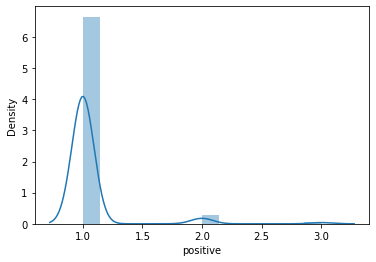

In [38]:
sns.distplot(videos_shares['positive'])

<AxesSubplot:ylabel='positive'>

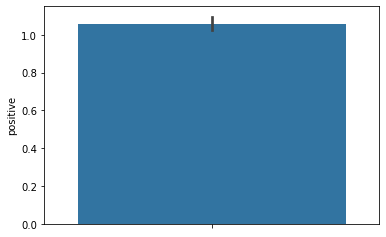

In [49]:
sns.barplot(y=videos_shares['positive'])
# define y: to have a vertical chart

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

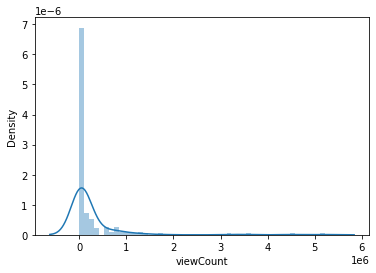

In [45]:
sns.distplot(videos_shares['viewCount'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shares', ylabel='Density'>

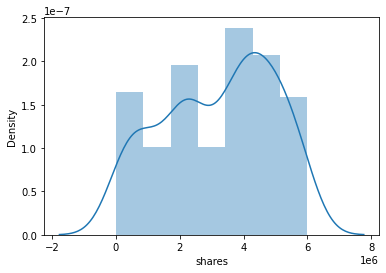

In [46]:
sns.distplot(videos_shares['shares'])

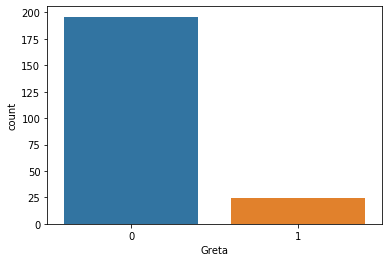

In [91]:
sns.countplot(x='Greta', data=videos_shares)

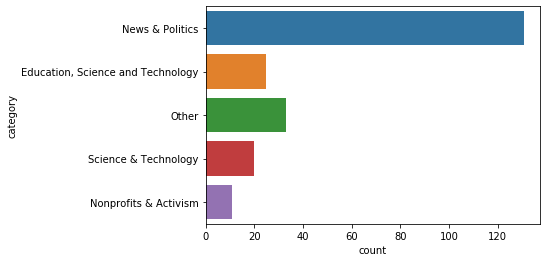

In [93]:
sns.countplot(y='category', data=videos_shares)

## Bivariate visualizations

For every relationship in a RQ (i.e., an IV vs. a DV), I need to create (and interpret) a bivariate visualisation. 

RQ1. To what extent does the sentiment expressed in the title of the video influence user engagement (views, ~~likes, dislikes~~ and shares)?

<AxesSubplot:xlabel='positive', ylabel='viewCount'>

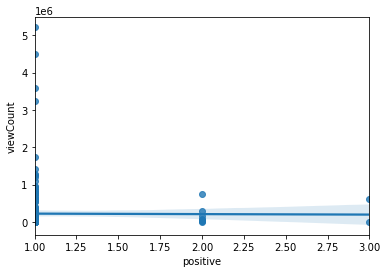

In [50]:
sns.regplot(x='positive', y='viewCount', data=videos_shares)
# regplot: regression plot

<AxesSubplot:xlabel='positive', ylabel='shares'>

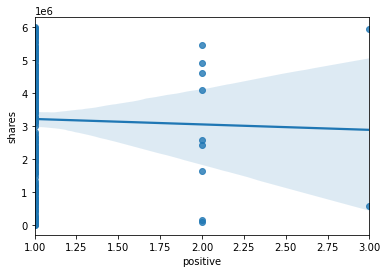

In [51]:
sns.regplot(x='positive', y='shares', data=videos_shares)

1. some kind of negative relationship, but not necessarily statistically significant
2. outliers are problems
3. if there is a relationship, the relationship is not clear

RQ3. To what extent does the sentiment expressed in the title of the video vary depending on whether Greta Thunberg is mentioned?

<AxesSubplot:xlabel='Greta', ylabel='positive'>

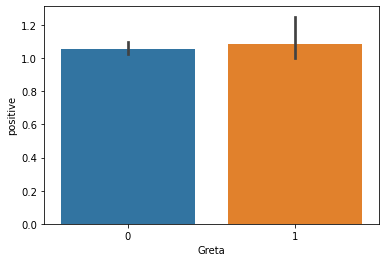

In [54]:
sns.barplot(x='Greta', y='positive', data=videos_shares)
# put `positive` on the y-axis because it is continuous

RQ3a. To what extent the category of the video is related to mentions of Greta Thunberg on the title?

<AxesSubplot:xlabel='category', ylabel='Greta'>

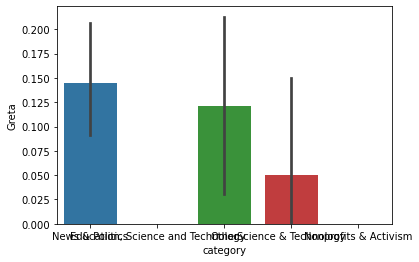

In [55]:
sns.barplot(x='category', y='Greta', data=videos_shares)

<AxesSubplot:xlabel='Greta', ylabel='category'>

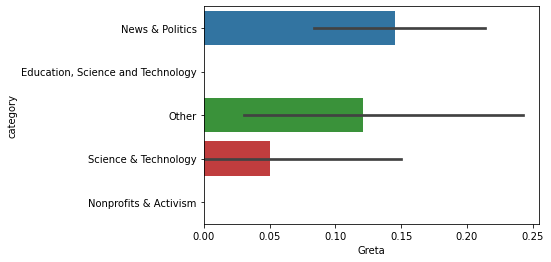

In [56]:
sns.barplot(y='category', x='Greta', data=videos_shares)

#### Important tip:
For every chart you are creating, you should have one MarkDown cell before it explaining what is being done - and defining what the variable is - and another after it to interpret the results of the chart. For A1, you can consider **combining descriptives and univariate visualisations in one section** and **bivariate visualisations in another**, for example, but you need to make sure that it is clear to the reader what is going on.